# Manipulacion de series y dataframes (Ejemplo en vivo)

In [ ]:
# Vamos a crear una estructura de serie
import pandas as pd
serie= pd.Series(data=[1,2,3,4],index=['David','Juan',1,2],name='SerieX')
serie

David    1
Juan     2
1        3
2        4
Name: SerieX, dtype: int64

In [ ]:
# Algunas propiedades de la serie
print('Indice de la serie:',serie.index)
print('Valores de la serie:',serie.values)
print('Longitud de serie:',serie.count())
# Verificar nulos en la serie
serie.isna()

Indice de la serie: Index(['David', 'Juan', 1, 2], dtype='object')
Valores de la serie: [1 2 3 4]
Longitud de serie: 4


David    False
Juan     False
1        False
2        False
Name: SerieX, dtype: bool

In [ ]:
# Filtrar un indice
serie.loc['David']

1

In [ ]:
# Filtrar pero de otra forma
serie.iloc[0]

1

In [ ]:
# Filtrar varios indices
serie.loc[['David',1]]

David    1
1        3
Name: SerieX, dtype: int64

In [ ]:
import numpy as np
serie_2= pd.Series(data=[1,2,5,6,np.nan , 20,np.nan])
serie_2

0     1.0
1     2.0
2     5.0
3     6.0
4     NaN
5    20.0
6     NaN
dtype: float64

In [ ]:
# Suma de nulos
serie_2.isnull().sum()

2

In [ ]:
# Conteo de valores no tiene en cuenta los NaN
serie_2.value_counts()

20.0    1
6.0     1
5.0     1
2.0     1
1.0     1
dtype: int64

In [ ]:
# Creemos un dataframe
valores= [1000, 3500, 3000, 4000, 3000 , 2450]
nombres= ['David','Juan','Pedro','Lucas','Andrea','Felipe']
genero=['M','M','M','M','F','M']
df= pd.DataFrame(data={'salarios':valores, 'genero':genero},index=nombres)
df

salarios genero
David       1000      M
Juan        3500      M
Pedro       3000      M
Lucas       4000      M
Andrea      3000      F
Felipe      2450      M

In [ ]:
# filtremos por genero
df_m= df[df['genero']=='M']
print(df_m.head())
print('------')
df_f=df[df['genero']=='F']
print(df_f.head())

        salarios genero
David       1000      M
Juan        3500      M
Pedro       3000      M
Lucas       4000      M
Felipe      2450      M
------
        salarios genero
Andrea      3000      F


In [ ]:
# Otra forma
condicion_h = df['genero']=='M'
condicion_m = df['genero']=='F'
print(df[condicion_h])
print('-------------')
print(df[condicion_m])

        salarios genero
David       1000      M
Juan        3500      M
Pedro       3000      M
Lucas       4000      M
Felipe      2450      M
-------------
        salarios genero
Andrea      3000      F


In [ ]:
# Algunas cosas adicionales
df.loc['David'][['salarios','genero']]

salarios    1000
genero         M
Name: David, dtype: object

In [ ]:
df.loc[['David','Juan']][['salarios','genero']]

salarios genero
David      1000      M
Juan       3500      M

# Lectura de csv t txt

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive'
df= pd.read_csv('winequality-red.csv',sep=',')
print(df[['density','pH','sulphates','alcohol','quality']].head())

/content/gdrive/MyDrive
   density    pH  sulphates  alcohol  quality
0   0.9978  3.51       0.56      9.4        5
1   0.9968  3.20       0.68      9.8        5
2   0.9970  3.26       0.65      9.8        5
3   0.9980  3.16       0.58      9.8        6
4   0.9978  3.51       0.56      9.4        5


In [ ]:
%cd '/content/gdrive/MyDrive'
df= pd.read_csv('pokemon_data.txt',delimiter='\t')
print(df[['Name','Type 1','HP','Attack','Defense']].head())

/content/gdrive/MyDrive
                    Name Type 1  HP  Attack  Defense
0              Bulbasaur  Grass  45      49       49
1                Ivysaur  Grass  60      62       63
2               Venusaur  Grass  80      82       83
3  VenusaurMega Venusaur  Grass  80     100      123
4             Charmander   Fire  39      52       43


# Lectura de xlsx

In [ ]:
%cd '/content/gdrive/MyDrive'
df= pd.read_excel('defaultoutput.xlsx')
print(df[['index','ID','Year_Birth','Education','Income']].head())

/content/gdrive/MyDrive
   index    ID  Year_Birth   Education   Income
0      0  5524        1957  Graduation  58138.0
1      1  2174        1954  Graduation  46344.0
2      2  4141        1965  Graduation  71613.0
3      3  6182        1984  Graduation  26646.0
4      4  5324        1981         PhD  58293.0


# Lectura desde Github /Apis

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
df = pd.read_csv(url, index_col=0)
print(df[['AMZN','MCD','SBUX','GOOG','MSFT']].head(5).round(1))

                 AMZN    MCD  SBUX   GOOG  MSFT
formatted_date                                 
2016-01-01      587.0  106.3  54.4  743.0  49.9
2016-02-01      552.5  100.7  52.1  697.8  46.0
2016-03-01      593.6  108.8  53.6  745.0  50.3
2016-04-01      659.6  109.5  50.5  693.0  45.5
2016-05-01      722.8  105.6  49.3  735.7  48.3


In [ ]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2021-12-23 17:22:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2021-12-23 17:22:23 (136 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [ ]:
filename = 'cars_clus.csv'
#Lectura
pdf = pd.read_csv(filename)
print ("Shape: ", pdf.shape)
print(pdf[['manufact','model','sales','resale']].head(5))

Shape:  (159, 16)
  manufact    model   sales  resale
0    Acura  Integra  16.919  16.360
1    Acura       TL  39.384  19.875
2    Acura       CL  14.114  18.225
3    Acura       RL   8.588  29.725
4     Audi       A4  20.397  22.255


# Adicional (No es necesario en clase)
Los datos se encuentran en la siguiente link:
[Data Acciones](https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv)



In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))

                       MCD        SBUX  ...          MA        PYPL
formatted_date                          ...                        
2021-01-01      203.187836   95.235695  ...  314.746094  234.309998
2021-02-01      201.525894  106.273232  ...  352.569061  259.850006
2021-03-01      220.471207  107.950699  ...  354.761108  242.839996
2021-04-01      232.215775  113.107674  ...  380.676971  262.290009
2021-05-01      230.061630  112.505043  ...  359.701202  260.019989

[5 rows x 14 columns]


In [ ]:
df.head()

MCD        SBUX  ...          MA        PYPL
formatted_date                          ...                        
2021-01-01      203.187836   95.235695  ...  314.746094  234.309998
2021-02-01      201.525894  106.273232  ...  352.569061  259.850006
2021-03-01      220.471207  107.950699  ...  354.761108  242.839996
2021-04-01      232.215775  113.107674  ...  380.676971  262.290009
2021-05-01      230.061630  112.505043  ...  359.701202  260.019989

[5 rows x 14 columns]

Miremos el tamaño de nuestro datraframe

In [ ]:
df.shape

(11, 14)

11 filas x 14 columnas

Las columnas son los precios de acciones de:

1. MCD: Macdonals
2. SBUX: Starbucks
3. GOOG: Google
4. AMZN: Amazon
5. MSFT: Microsoft
6. JPM: JPMorgan Chase & Co.
7. BAC: Bank of America Corp
8. C: Citigroup
9. MAR: Pharma MAr
10. HLT: Hoteles Hilton
11. RCL: Royal Caribbean Cruises
12. V: Visa Inc.
13. MA: Mastercard 
14. PYPL: Paypal

# Analizando el comportamiento de una serie de tiempo

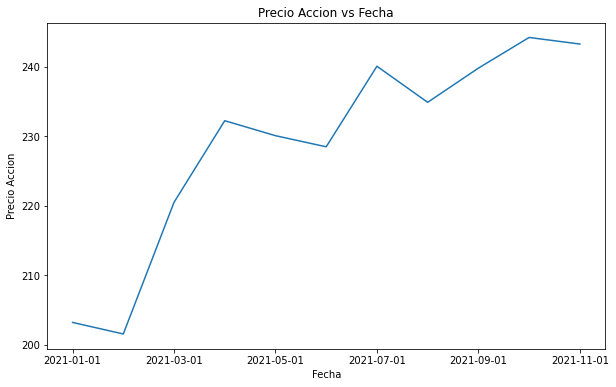

In [ ]:
df['MCD'].plot(kind='line',figsize=(10,6),xlabel='Fecha', ylabel='Precio Accion', title='Precio Accion vs Fecha')

Se observa un comportamiento creciente entre el 01/01/21 hasta el 11/01/2021 

# Grafiquemos todas las series de tiempo

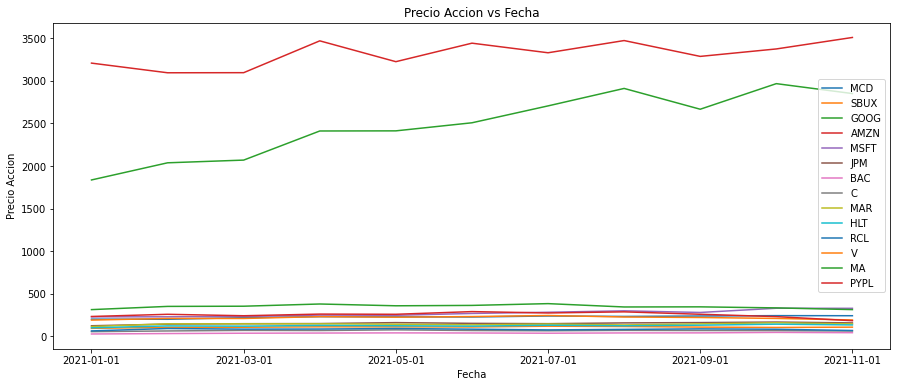

In [ ]:
df.plot(kind='line',figsize=(15,6),xlabel='Fecha', ylabel='Precio Accion', title='Precio Accion vs Fecha').legend(loc='best')

**En cual accion invertirian y porque?**

Al parecer hay una gran diferencia en el comportamiento de las acciones **GOOG (Google) y AMZN (Amazon)** respecto a las demás, por otro lado podemos analizar el porcentaje de cambio cada día para entender como estan sucediendo los cambios diarios de manera porcentual

In [ ]:
df_cambios=df.pct_change()*100
df_cambios

MCD       SBUX       GOOG  ...          V         MA       PYPL
formatted_date                                  ...                                 
2021-01-01           NaN        NaN        NaN  ...        NaN        NaN        NaN
2021-02-01     -0.817934  11.589706  10.955800  ...   9.904269  12.016978  10.900093
2021-03-01      9.400932   1.578448   1.559749  ...  -0.155997   0.621736  -6.546088
2021-04-01      5.327030   4.777157  16.508039  ...  10.310309   7.305159   8.009394
2021-05-01     -0.927648  -0.532794   0.059746  ...  -2.680249  -5.510123  -0.865462
2021-06-01     -0.694454  -1.427060   3.929407  ...   3.017877   1.250767  12.099078
2021-07-01      5.073810   8.603875   7.904013  ...   5.375928   5.710923  -5.472078
2021-08-01     -2.163073  -3.244665   7.573531  ...  -7.017328 -10.183470   4.765363
2021-09-01      2.093757  -5.746744  -8.384662  ...  -2.639177   0.418791  -9.855890
2021-10-01      1.841486  -3.843711  11.259473  ...  -4.929288  -3.497477 -10.614502
2021-11-01     -0.386887   3.365701  -3.924242  ...  -8.499787  -6.021122 -20.508189

[11 rows x 14 columns]

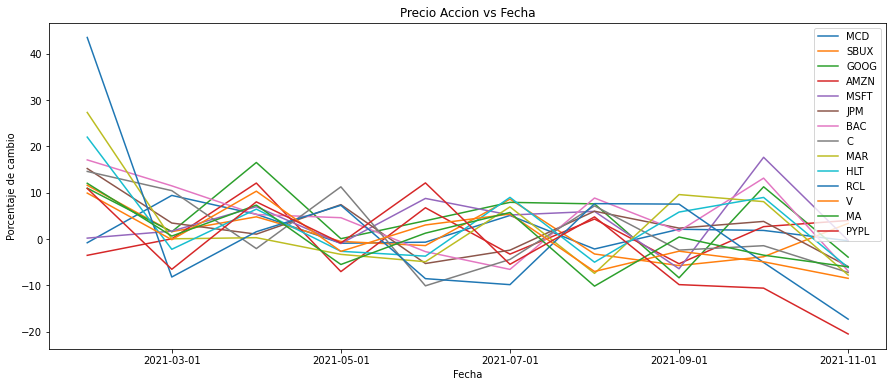

In [ ]:
df_cambios.plot(kind='line',figsize=(15,6),xlabel='Fecha', ylabel='Porcentaje de cambio', title='Precio Accion vs Fecha').legend(loc='best')

**Siguen pensando lo mismo respecto a la pregunta anterior** 
Teniendo en cuenta esta información cual sería a la acción en la cual invertirian?

La respuesta en que accion invertir no solo pasa por el valor de la acción en si sino mas bien por factores asociados a la volatididad que pueda tener la acción.

Cuando se prefiere aversion al riesgo (evitar incertidumbre en inversiones) se requieren acciones que tengan poca volatilidad. 🧱 🈶 ☁ 🪗 ❎

Por el contrario cuando se asumen riesgos las inversiones podrían enfocarse en aquellas acciones con mayor volatilidad ⏰ ⚗ ⛹ ♟

# Grafico interactivo

Para generar un grafico dinamico podemos usar plotly con el fin de poder establecer el valor en cada momento del tiempo para cada accion

Ademas debemos hacer uso de la funcion ```melt``` que explicaremos posteriormente mas adelante pero consiste en formato long del dataframe para facilitar el grafico en plotly

In [ ]:
df_n=df.copy()
df_n['Fecha']=df.index
df_n= df_n.reset_index(drop=True)
df_n

MCD        SBUX         GOOG  ...          MA        PYPL       Fecha
0   203.187836   95.235695  1835.739990  ...  314.746094  234.309998  2021-01-01
1   201.525894  106.273232  2036.859985  ...  352.569061  259.850006  2021-02-01
2   220.471207  107.950699  2068.629883  ...  354.761108  242.839996  2021-03-01
3   232.215775  113.107674  2410.120117  ...  380.676971  262.290009  2021-04-01
4   230.061630  112.505043  2411.560059  ...  359.701202  260.019989  2021-05-01
5   228.463959  110.899529  2506.320068  ...  364.200226  291.480011  2021-06-01
6   240.055786  120.441185  2704.419922  ...  384.999420  275.529999  2021-07-01
7   234.863205  116.533272  2909.239990  ...  345.793121  288.660004  2021-08-01
8   239.780670  109.836403  2665.310059  ...  347.241272  260.209991  2021-09-01
9   244.196198  105.614609  2965.409912  ...  335.096588  232.589996  2021-10-01
10  243.251434  109.169281  2849.040039  ...  314.920013  184.889999  2021-11-01

[11 rows x 15 columns]

In [ ]:
df_long=pd.melt(df_n , value_vars=df.columns,id_vars='Fecha')
df_long

Fecha variable       value
0    2021-01-01      MCD  203.187836
1    2021-02-01      MCD  201.525894
2    2021-03-01      MCD  220.471207
3    2021-04-01      MCD  232.215775
4    2021-05-01      MCD  230.061630
..          ...      ...         ...
149  2021-07-01     PYPL  275.529999
150  2021-08-01     PYPL  288.660004
151  2021-09-01     PYPL  260.209991
152  2021-10-01     PYPL  232.589996
153  2021-11-01     PYPL  184.889999

[154 rows x 3 columns]

In [ ]:
import plotly.express as px


fig=px.line(data_frame=df_long,x='Fecha',y='value',line_group='variable',color='variable',title='Comportamiento de precio de acciones',\
             labels={
                     "Fecha": "Fecha_dias",
                     "value": "Precio (USD)"
                 })
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()

# Excluyendo Amazon y GOOGLE

In [ ]:
df_n=df.copy()
df_n['Fecha']=df.index
df_n= df_n.reset_index(drop=True)
df_n= df_n.drop(columns=['GOOG','AMZN'])
df_n

MCD        SBUX        MSFT  ...          MA        PYPL       Fecha
0   203.187836   95.235695  230.031799  ...  314.746094  234.309998  2021-01-01
1   201.525894  106.273232  230.448318  ...  352.569061  259.850006  2021-02-01
2   220.471207  107.950699  234.348633  ...  354.761108  242.839996  2021-03-01
3   232.215775  113.107674  250.659698  ...  380.676971  262.290009  2021-04-01
4   230.061630  112.505043  248.174774  ...  359.701202  260.019989  2021-05-01
5   228.463959  110.899529  269.888611  ...  364.200226  291.480011  2021-06-01
6   240.055786  120.441185  283.846313  ...  384.999420  275.529999  2021-07-01
7   234.863205  116.533272  300.752960  ...  345.793121  288.660004  2021-08-01
8   239.780670  109.836403  281.405182  ...  347.241272  260.209991  2021-09-01
9   244.196198  105.614609  331.014404  ...  335.096588  232.589996  2021-10-01
10  243.251434  109.169281  329.986298  ...  314.920013  184.889999  2021-11-01

[11 rows x 13 columns]

In [ ]:
columnas=list(df.columns)
unwanted_num = {'AMZN', 'GOOG'}
 
col_final = [x for x in columnas if x not in unwanted_num]
col_final

['MCD',
 'SBUX',
 'MSFT',
 'JPM',
 'BAC',
 'C',
 'MAR',
 'HLT',
 'RCL',
 'V',
 'MA',
 'PYPL']

In [ ]:
df_long=pd.melt(df_n , value_vars=col_final,id_vars='Fecha')
df_long

Fecha variable       value
0    2021-01-01      MCD  203.187836
1    2021-02-01      MCD  201.525894
2    2021-03-01      MCD  220.471207
3    2021-04-01      MCD  232.215775
4    2021-05-01      MCD  230.061630
..          ...      ...         ...
127  2021-07-01     PYPL  275.529999
128  2021-08-01     PYPL  288.660004
129  2021-09-01     PYPL  260.209991
130  2021-10-01     PYPL  232.589996
131  2021-11-01     PYPL  184.889999

[132 rows x 3 columns]

In [ ]:
import plotly.express as px


fig=px.line(data_frame=df_long,x='Fecha',y='value',line_group='variable',color='variable',title='Comportamiento de precio de acciones',\
             labels={
                     "Fecha": "Fecha_dias",
                     "value": "Precio (USD)"
                 })
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()

Ahora se pueden ver mucho mejor las fluctuaciones de cada compañia que antes no era tan claro 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8356f45d-6068-4a0e-b828-5b373008ccdc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>